# 라이브러리

In [1]:
# matplotlib 설치
!pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# 라이브러리
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터 전처리

In [3]:
# 파일 목록
file_name = glob('*.csv')
file_name

['sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
# 데이터 불러오기
train = pd.read_csv(file_name[2])
test = pd.read_csv(file_name[1])
submission = pd.read_csv(file_name[0])

In [5]:
# 불러온 데이터 확인
train

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,151.0
7496,TRAIN_7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,114.0
7497,TRAIN_7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,41.0
7498,TRAIN_7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,57.0


In [6]:
# 데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   float64
 5   Height(Remainder_Inches)  7500 non-null   float64
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int64  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 644.7+ KB


## object 타입 처리

In [7]:
# 사용하지 않을 'ID' 제거
train = train.drop(columns='ID').copy()
test = test.drop(columns='ID').copy()

In [8]:
# 'Weight_Status' 의 class 확인 => 크기 비교가 가능하고 class 가 3개니까 OrdinalEncoding 하자
train['Weight_Status'].unique()

array(['Normal Weight', 'Overweight', 'Obese'], dtype=object)

In [9]:
# Encoding 을 하기 위해 'Weight_Status' 의 타입을 'category' 로 변경
train['Weight_Status'] = train['Weight_Status'].astype('category')
test['Weight_Status'] = test['Weight_Status'].astype('category')

In [10]:
# OrdinalEncoder 적용
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Normal Weight', 'Overweight', 'Obese']],
                    handle_unknown='use_encoded_value',
                    unknown_value=-1)

train['Weight_Status'] = oe.fit_transform(np.array(train['Weight_Status']).reshape(-1, 1)) # reshape(-1, 1) 을 통해 1차원 배열을 열 벡터(2차원 배열)로 변환 (-1은 자동으로 크기를 조정하는 의미를 가지며, 1은 새로운 배열의 차원을 1로 지정하는 것을 의미)
test['Weight_Status'] = oe.transform(np.array(test['Weight_Status']).reshape(-1, 1))

In [11]:
# 확인
train['Weight_Status'].unique()

array([0., 1., 2.])

In [12]:
# binary class 인 'Gender' 인코딩
train = pd.get_dummies(train).copy()
test = pd.get_dummies(test).copy()

In [13]:
# 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Exercise_Duration         7500 non-null   float64
 1   Body_Temperature(F)       7500 non-null   float64
 2   BPM                       7500 non-null   float64
 3   Height(Feet)              7500 non-null   float64
 4   Height(Remainder_Inches)  7500 non-null   float64
 5   Weight(lb)                7500 non-null   float64
 6   Weight_Status             7500 non-null   float64
 7   Age                       7500 non-null   int64  
 8   Calories_Burned           7500 non-null   float64
 9   Gender_F                  7500 non-null   uint8  
 10  Gender_M                  7500 non-null   uint8  
dtypes: float64(8), int64(1), uint8(2)
memory usage: 542.1 KB


## 컬럼 정리

In [14]:
# 컬럼 확인
train.columns

Index(['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Age',
       'Calories_Burned', 'Gender_F', 'Gender_M'],
      dtype='object')

In [15]:
# 컬럼 순서 정리
train = train[['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
               'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Age',
               'Gender_F', 'Gender_M', 'Calories_Burned']].copy()

test = test[['Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
               'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Age',
               'Gender_F', 'Gender_M']].copy()

In [16]:
# 컬럼명 한글화
kor_cols = {
    'Exercise_Duration' : '운동시간',
    'Body_Temperature(F)' : '체온(화씨)',
    'BPM' : '심박수',
    'Height(Feet)' : '신장(피트)',
    'Height(Remainder_Inches)' : '신장(나머지인치)',
    'Weight(lb)' : '몸무게(파운드)',
    'Weight_Status' : '비만정도',
    'Age' : '나이',
    'Gender_F' : '여성',
    'Gender_M' : '남성',
    'Calories_Burned' : '칼로리소모량'
}

In [17]:
# 컬럼명 한글로 변경
train = train.rename(columns=kor_cols).copy()
test = test.rename(columns=kor_cols).copy()

In [18]:
# 확인
train.head()

,운동시간,체온(화씨),심박수,신장(피트),신장(나머지인치),몸무게(파운드),비만정도,나이,여성,남성,칼로리소모량
0,26.0,105.6,107.0,5.0,9.0,154.3,0.0,45,1,0,166.0
1,7.0,103.3,88.0,6.0,6.0,224.9,1.0,50,0,1,33.0
2,7.0,103.3,86.0,6.0,3.0,218.3,1.0,29,0,1,23.0
3,17.0,104.0,99.0,5.0,6.0,147.7,0.0,33,1,0,91.0
4,9.0,102.7,88.0,5.0,10.0,169.8,0.0,38,0,1,32.0


## 도메인 지식 활용을 위해 SI단위로 변환

In [19]:
# 체온 F -> C 변환
train['체온(화씨)'] = train['체온(화씨)'].map(lambda x: (x-32)*5/9).copy()
test['체온(화씨)'] = test['체온(화씨)'].map(lambda x: (x-32)*5/9).copy()

# 컬럼명 변경
train = train.rename(columns={'체온(화씨)' : '체온'}).copy()
test = test.rename(columns={'체온(화씨)' : '체온'}).copy()

In [20]:
# 신장 피트와 인치 -> cm 변환
train['신장(피트)'] = train['신장(피트)'].map(lambda x: x/3.281*100).copy()
train['신장(나머지인치)'] = train['신장(나머지인치)'].map(lambda x: x/39.37*100).copy()

test['신장(피트)'] = test['신장(피트)'].map(lambda x: x/3.281*100).copy()
test['신장(나머지인치)'] = test['신장(나머지인치)'].map(lambda x: x/39.37*100).copy()

# 하나로 합치기
train['신장(피트)'] = (train['신장(피트)'] + train['신장(나머지인치)']).copy()
test['신장(피트)'] = (test['신장(피트)'] + test['신장(나머지인치)']).copy()

# 컬럼 정리
train = train.rename(columns={'신장(피트)' : '신장'}).drop(columns='신장(나머지인치)').copy()
test = test.rename(columns={'신장(피트)' : '신장'}).drop(columns='신장(나머지인치)').copy()

In [21]:
# 몸무게 lb -> kg 변환
train['몸무게(파운드)'] = train['몸무게(파운드)'].map(lambda x: x/2.205).copy()
test['몸무게(파운드)'] = test['몸무게(파운드)'].map(lambda x: x/2.205).copy()

# 컬럼명 변경
train = train.rename(columns={'몸무게(파운드)' : '몸무게'}).copy()
test = test.rename(columns={'몸무게(파운드)' : '몸무게'}).copy()

In [22]:
# 확인
train.head()

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
0,26.0,40.888889,107.0,175.252609,69.977324,0.0,45,1,0,166.0
1,7.0,39.611111,88.0,198.111106,101.995465,1.0,50,0,1,33.0
2,7.0,39.611111,86.0,190.491091,99.002268,1.0,29,0,1,23.0
3,17.0,40.000000,99.0,167.632594,66.984127,0.0,33,1,0,91.0
4,9.0,39.277778,88.0,177.792614,77.006803,0.0,38,0,1,32.0


In [23]:
# 확인
test.head()

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성
0,26.0,40.611111,107.0,154.932568,51.972789,0.0,45,1,0
1,29.0,40.500000,111.0,187.951086,89.977324,1.0,21,0,1
2,11.0,40.000000,90.0,175.252609,77.006803,0.0,58,0,1
3,24.0,40.777778,108.0,182.872624,88.979592,1.0,35,0,1
4,29.0,41.111111,116.0,170.172599,66.984127,0.0,67,1,0


# EDA

In [24]:
# 기술통계
train.describe()

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,40.018652,95.498133,174.498350,74.993735,0.403200,42.636000,0.502533,0.497467,89.373467
std,8.3553,0.784914,9.587331,14.317660,15.105730,0.543448,16.883188,0.500027,0.500027,62.817086
min,1.0000,37.111111,69.000000,121.914051,36.009070,0.000000,20.000000,0.000000,0.000000,1.000000
25%,8.0000,39.611111,88.000000,165.092589,62.993197,0.000000,28.000000,0.000000,0.000000,35.000000
50%,15.0000,40.222222,95.000000,175.252609,73.968254,0.000000,39.000000,1.000000,0.000000,77.000000
75%,23.0000,40.611111,103.000000,185.411081,86.984127,1.000000,56.000000,1.000000,1.000000,138.000000
max,30.0000,41.500000,128.000000,218.429599,131.972789,2.000000,79.000000,1.000000,1.000000,300.000000


* 이상치
    * max: 체온이 너무 높다?
    * min: 신장 121? 몸무게 36?    

In [25]:
# 신장 140 이하면 이상치일까? => 30 행
train[train['신장'] < 140]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
501,26.0,40.611111,113.0,139.694086,42.993197,0.0,58,1,0,199.0
906,6.0,39.500000,89.0,132.074071,44.988662,1.0,25,1,0,27.0
1265,25.0,40.500000,117.0,137.154081,45.986395,0.0,63,1,0,203.0
1506,25.0,40.722222,104.0,126.994061,39.002268,0.0,30,1,0,156.0
1601,5.0,39.111111,85.0,139.694086,47.981859,0.0,75,1,0,24.0
1864,12.0,40.000000,90.0,139.694086,44.988662,0.0,43,1,0,59.0
2017,29.0,40.777778,102.0,126.994061,40.000000,0.0,58,1,0,189.0
2583,23.0,40.722222,95.0,137.154081,44.988662,0.0,76,1,0,138.0
2819,10.0,39.888889,92.0,132.074071,40.000000,0.0,59,1,0,55.0
2853,11.0,40.111111,94.0,137.154081,44.988662,0.0,20,1,0,54.0


In [26]:
test[test['신장'] < 140]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성
80,24.0,40.500000,114.0,139.694086,47.981859,0.0,33,1,0
554,13.0,40.111111,101.0,137.154081,44.988662,0.0,29,1,0
713,3.0,38.277778,82.0,137.154081,41.995465,0.0,40,1,0
909,11.0,39.888889,86.0,139.694086,43.990930,0.0,75,1,0
1024,28.0,40.611111,105.0,137.154081,44.988662,0.0,29,1,0
1582,5.0,39.277778,85.0,132.074071,40.997732,0.0,20,1,0
1611,17.0,40.111111,97.0,137.154081,40.997732,0.0,36,1,0
1624,22.0,40.777778,100.0,137.154081,46.984127,1.0,73,1,0
1720,20.0,40.277778,94.0,137.154081,46.984127,1.0,71,1,0
1724,17.0,40.388889,102.0,134.614076,42.993197,0.0,26,1,0


In [27]:
# 몸무게가 40 이하면 이상치일까? => 5행
train[train['몸무게'] < 40]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
1506,25.0,40.722222,104.0,126.994061,39.002268,0.0,30,1,0,156.0
2875,6.0,39.111111,90.0,134.614076,39.002268,0.0,35,1,0,29.0
3243,5.0,39.222222,91.0,132.074071,36.009070,0.0,26,1,0,24.0
5154,30.0,40.500000,112.0,132.074071,38.004535,0.0,35,1,0,216.0
6896,4.0,39.111111,86.0,132.074071,38.004535,0.0,27,1,0,17.0


In [28]:
test[test['몸무게'] < 40]

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성
4509,17.0,40.388889,98.0,134.614076,38.004535,0.0,59,1,0
5410,22.0,40.722222,103.0,134.614076,38.004535,0.0,27,1,0


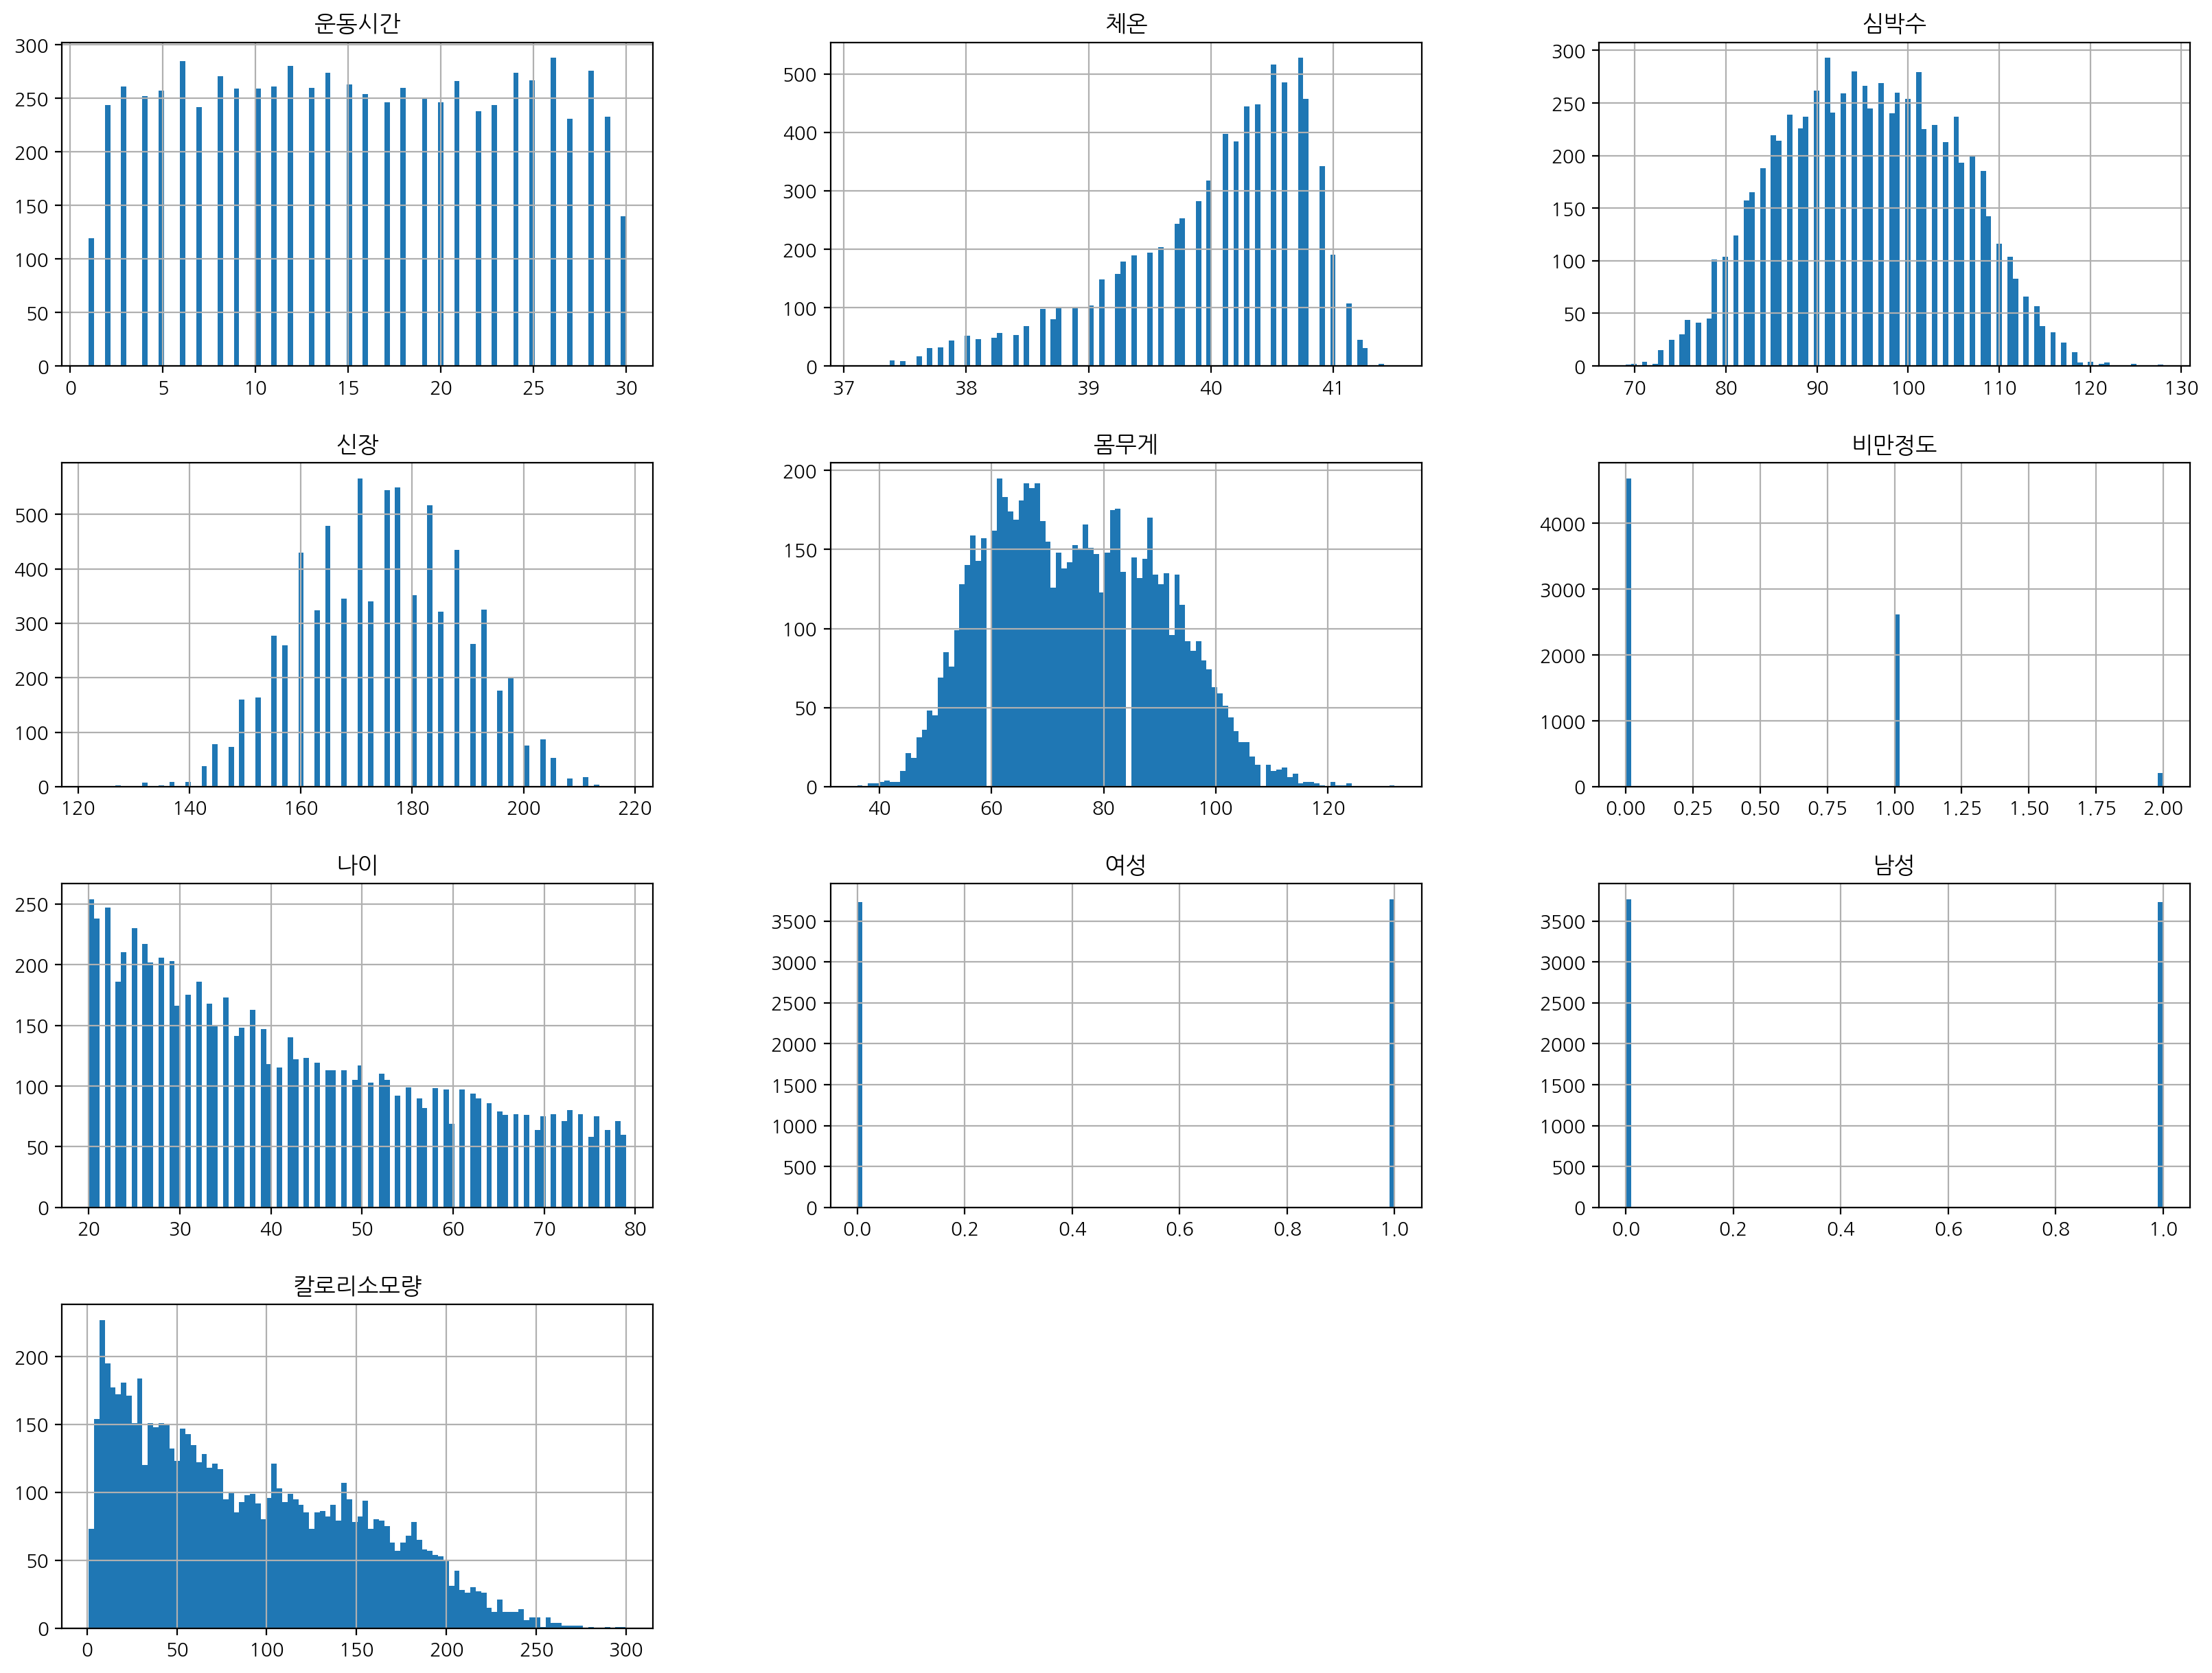

In [29]:
# 히스토그램
train.hist(bins=100, figsize=(20, 15));

* 전체적으로 정규화? => batchnormalization 으로 되겠지
    * 체온 label_smoothing?
    * 신장, 나이, 구간화
    * 칼로리소모량 label_smoothing 적용, 제출 전 되돌리기

* 특별히 이상치는 모르겠다.
    * 신장에 특정 키들이 빈도수가 높다
    * 비만정도 2인 값의 수가 많이 적은듯   

In [30]:
# 상관 관계
train.corr().style.background_gradient(axis=0)

,운동시간,체온,심박수,신장,몸무게,비만정도,나이,여성,남성,칼로리소모량
운동시간,1.000000,0.904314,0.853489,-0.003146,0.002236,0.015547,0.017734,-0.007789,0.007789,0.954783
체온,0.904314,1.000000,0.770707,0.002979,0.007554,0.014376,0.016474,-0.012012,0.012012,0.824379
심박수,0.853489,0.770707,1.000000,0.006319,0.012562,0.021080,0.014702,-0.016898,0.016898,0.899900
신장,-0.003146,0.002979,0.006319,1.000000,0.957815,0.407672,0.011183,-0.704117,0.704117,0.021906
몸무게,0.002236,0.007554,0.012562,0.957815,1.000000,0.564964,0.090536,-0.779709,0.779709,0.042568
비만정도,0.015547,0.014376,0.021080,0.407672,0.564964,1.000000,0.163474,-0.548964,0.548964,0.060046
나이,0.017734,0.016474,0.014702,0.011183,0.090536,0.163474,1.000000,-0.006035,0.006035,0.159624
여성,-0.007789,-0.012012,-0.016898,-0.704117,-0.779709,-0.548964,-0.006035,1.000000,-1.000000,-0.027619
남성,0.007789,0.012012,0.016898,0.704117,0.779709,0.548964,0.006035,-1.000000,1.000000,0.027619
칼로리소모량,0.954783,0.824379,0.899900,0.021906,0.042568,0.060046,0.159624,-0.027619,0.027619,1.000000


* 심박수, 체온과 강한 상관 관계를 갖는다
* 다중공선성
    * 운동시간과 [체온, 심박수] 는 다중공선성
    * 신장과 [몸무게, 비만정도, 남성] 도 다중공선성

In [31]:
train.groupby('신장')['신장'].value_counts().nlargest(10)

신장          신장        
170.172599  170.172599    566
177.792614  177.792614    549
175.252609  175.252609    545
165.092589  165.092589    479
187.951086  187.951086    435
160.012578  160.012578    430
180.332619  180.332619    352
167.632594  167.632594    345
182.871076  182.871076    343
172.712604  172.712604    340
Name: 신장, dtype: int64

In [32]:
# '비만정도' 2의 빈도수가 엄청 적네? => 확인 결과: 205행으로 무시 못함
train[train['비만정도']==2].count()

운동시간      205
체온        205
심박수       205
신장        205
몸무게       205
비만정도      205
나이        205
여성        205
남성        205
칼로리소모량    205
dtype: int64

# 머신러닝, 딥러닝

## 데이터 분리

In [33]:
# 종속변수 지정
label_name = '칼로리소모량'
X = train.drop(columns=label_name).copy()
y = train[label_name].copy()

In [34]:
from sklearn.model_selection import train_test_split

# train_test_split?
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((6000, 9), (1500, 9), (6000,), (1500,))

In [35]:
X_test = test.copy()

In [36]:
X_test.shape

(7500, 9)

## 머신러닝 lgbm 으로 해보기

In [37]:
# lgbm 은 한글 컬럼을 지원하지 않는다.. 다시 영문화
eng_cols = {
    '운동시간' : 'exercise_time',
    '체온' : 'temperature',
    '심박수' : 'heart_rate',
    '신장' : 'height',
    '몸무게' : 'weight',
    '비만정도' : 'obesity',
    '나이' : 'age',
    '여성' : 'female',
    '남성' : 'male',
    '칼로리소모량' : 'calorie'
}

In [38]:
# 컬럼명 영문으로 변경
X_train = X_train.rename(columns=eng_cols).copy()
y_train = y_train.rename(eng_cols).copy()
X_test = X_test.rename(columns=kor_cols).copy()

In [39]:
# lightgbm
import lightgbm

model_lgbm = lightgbm.LGBMRegressor(# max_depth=-1,
                                    random_state=42,
                                    n_jobs=-1,                                    
                                    silent=True)

In [40]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'learning_rate': np.arange(0.001, 0.01, 0.001),
                       'n_estimators': range(100, 1100, 100)
#                        'subsample': np.arange(0.5, 1.0, 0.1)
                      }

rscv = RandomizedSearchCV(estimator=model_lgbm,
                          param_distributions=param_distributions,
                          n_iter=30,
                          scoring='neg_root_mean_squared_error',
                          n_jobs=-1,
                          cv=5,
                          verbose=2,
                          random_state=42)

rscv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..............learning_rate=0.005, n_estimators=100; total time= 6.1min
[CV] END ..............learning_rate=0.005, n_estimators=100; total time= 6.1min
[CV] END ..............learning_rate=0.005, n_estimators=100; total time= 3.3min
[CV] END ..............learning_rate=0.005, n_estimators=100; total time= 6.1min
[CV] END ..............learning_rate=0.005, n_estimators=100; total time= 6.1min
[CV] END ..............learning_rate=0.003, n_estimators=300; total time=18.1min
[CV] END ..............learning_rate=0.003, n_estimators=300; total time=16.1min
[CV] END ..............learning_rate=0.003, n_estimators=300; total time=15.4min
[CV] END ..............learning_rate=0.003, n_estimators=300; total time=17.1min
[CV] END ..............learning_rate=0.003, n_estimators=300; total time= 5.6min
[CV] END ..............learning_rate=0.006, n_estimators=600; total time= 5.1min
[CV] END ..............learning_rate=0.006, n_e

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]),
                                        'n_estimators': range(100, 1100, 100)},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [49]:
# 각 파라미터마다의 순위
pd.DataFrame(rscv.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,3.088413,0.621476,0.110638,0.011378,1000,0.007,"{'n_estimators': 1000, 'learning_rate': 0.007}",-2.652058,-2.451308,-2.394681,-2.698576,-2.528917,-2.545108,0.115481,1
13,1.913175,0.150932,0.063333,0.013817,700,0.009,"{'n_estimators': 700, 'learning_rate': 0.00900...",-2.795853,-2.561746,-2.505065,-2.797376,-2.681643,-2.668337,0.119254,2
22,1.938711,0.042148,0.061618,0.011066,700,0.008,"{'n_estimators': 700, 'learning_rate': 0.008}",-3.002839,-2.732619,-2.683144,-2.966778,-2.845963,-2.846269,0.125350,3
27,2.468644,0.111859,0.076158,0.010693,800,0.007,"{'n_estimators': 800, 'learning_rate': 0.007}",-2.989130,-2.731388,-2.682063,-2.992116,-2.836753,-2.846290,0.128010,4
18,3.190719,0.418677,0.102025,0.012658,1000,0.005,"{'n_estimators': 1000, 'learning_rate': 0.005}",-3.217959,-2.933224,-2.915160,-3.204485,-3.077926,-3.069751,0.128627,5
26,2.272781,0.147261,0.058573,0.007635,700,0.007,"{'n_estimators': 700, 'learning_rate': 0.007}",-3.262679,-2.997739,-2.967585,-3.259334,-3.123360,-3.122139,0.124850,6
29,1.547252,0.524255,0.041606,0.011191,600,0.008,"{'n_estimators': 600, 'learning_rate': 0.008}",-3.322160,-3.052152,-3.013857,-3.288194,-3.190272,-3.173327,0.123083,7
7,1.974161,0.420919,0.050194,0.009952,600,0.007,"{'n_estimators': 600, 'learning_rate': 0.007}",-3.748005,-3.446385,-3.433483,-3.701399,-3.620734,-3.590001,0.129184,8
12,2.007415,0.254079,0.056025,0.007391,700,0.006,"{'n_estimators': 700, 'learning_rate': 0.006}",-3.752816,-3.453363,-3.423376,-3.697050,-3.638949,-3.593111,0.131719,9
6,3.048522,0.895026,0.100346,0.015434,1000,0.004,"{'n_estimators': 1000, 'learning_rate': 0.004}",-3.955456,-3.628148,-3.608136,-3.876703,-3.836667,-3.781022,0.138519,10


In [42]:
# 성능이 가장 좋은 모델의 파라미터
best_model = rscv.best_estimator_
best_model

LGBMRegressor(learning_rate=0.007, n_estimators=1000, random_state=42)

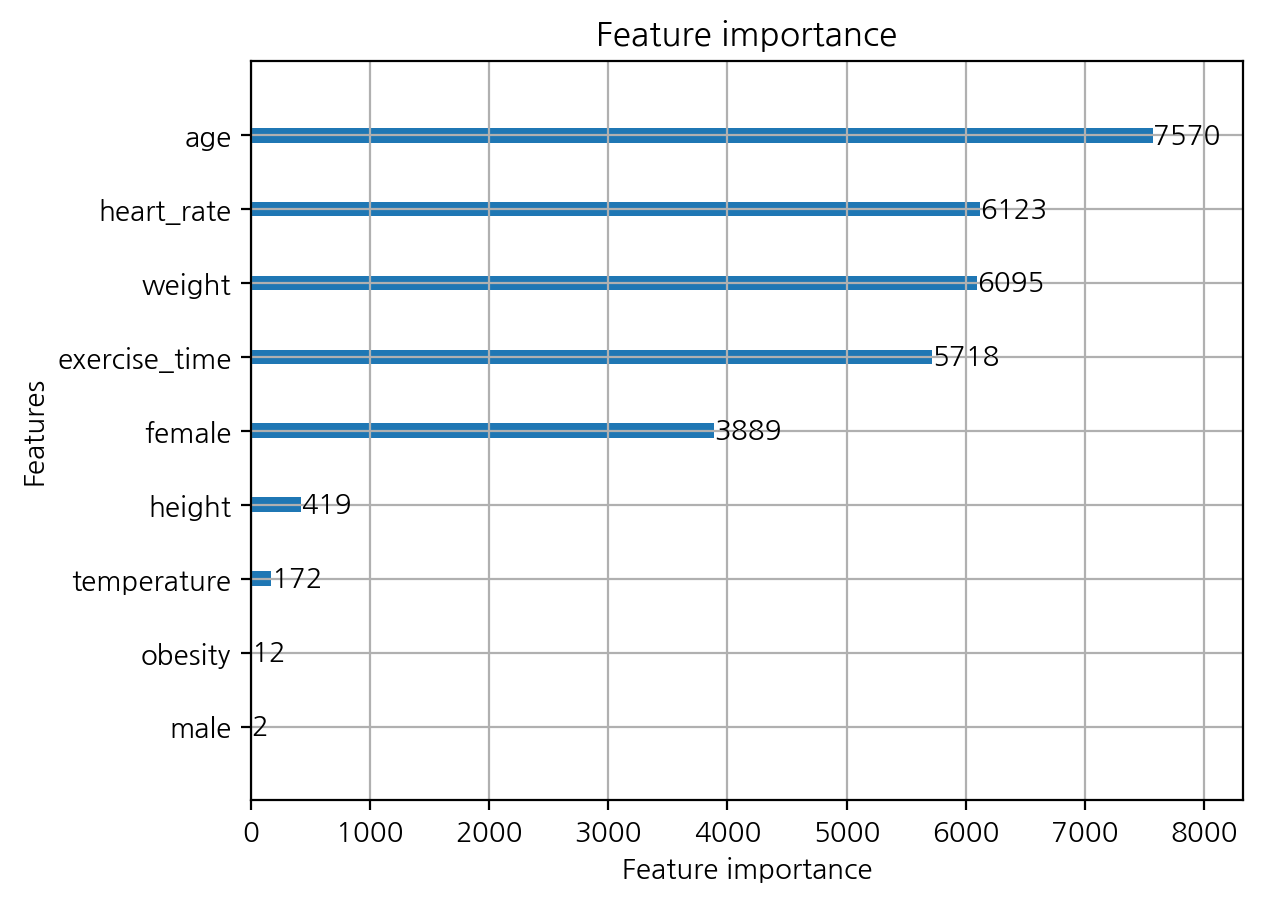

In [75]:
# feature_importance_
lightgbm.plot_importance(best_model);

In [44]:
# valid 안 해봤지만.. 바로 X_test
y_predict = best_model.predict(X_test)

In [46]:
# OMR 카드 작성
submission['Calories_Burned'] = y_predict

In [48]:
# 제출
submission.to_csv('sub_1_lgbm.csv',index=False)

## 딥러닝 tensorflow 로 해보기